# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [0]:
import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

In [0]:
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

# Geopandas
We can read a `GeoDataFrame` from a file using `read_file`.

In [0]:
countries = geopandas.read_file('data/ne_110m_admin_0_countries.shp')


Just like before, the data frame knows how to plot itself, but it looks very different for a `GeoDataFrame`

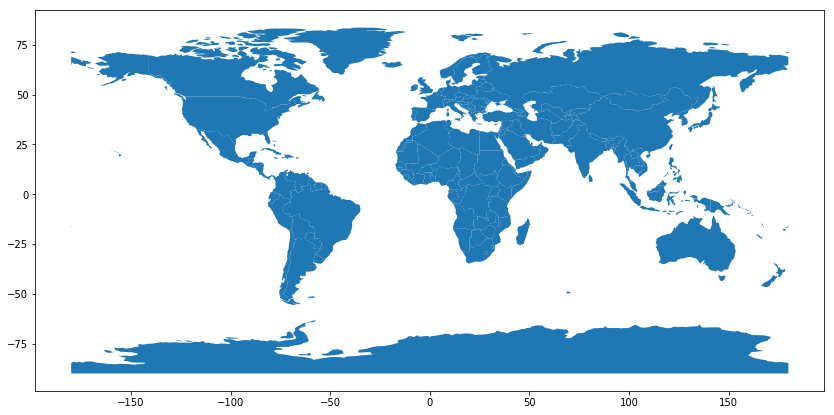

In [0]:
countries.plot(figsize=(15, 7))

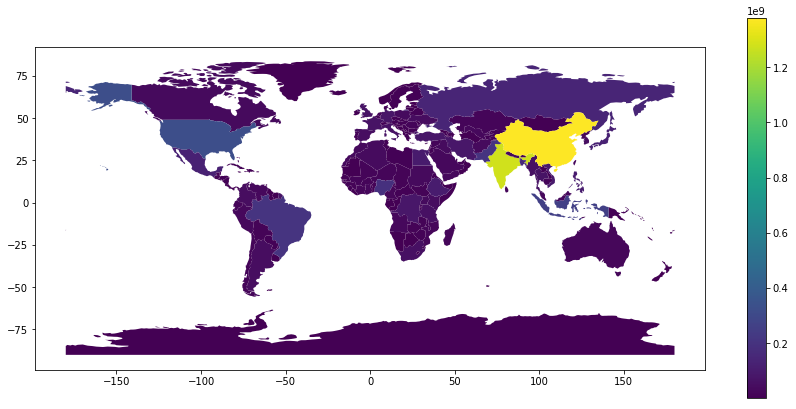

In [0]:
countries.plot(column='POP_EST', legend=True, figsize=(15, 7))

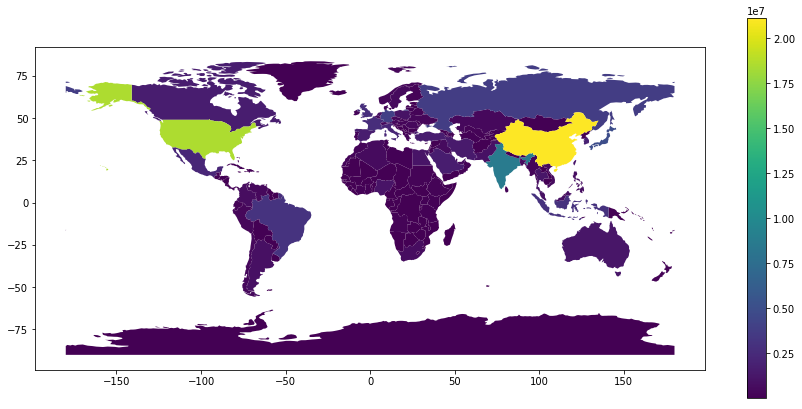

In [0]:
countries.plot(column='GDP_MD_EST', legend=True, figsize=(15, 7))

Can use similar pandas functionality, like computing values and filterings

In [0]:
countries['GDP_MD_EST'].mean()

666896.723559322

Filter the data to rows that belong in South america, then plot that

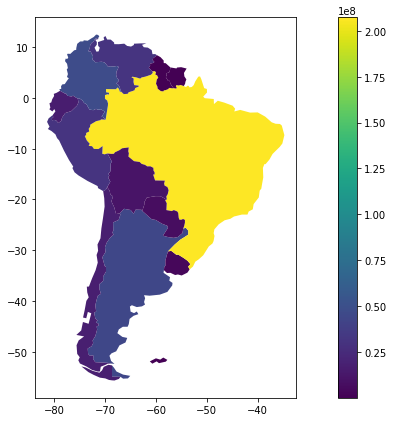

In [0]:
south_america = countries[countries['CONTINENT'] == 'South America']
south_america.plot(column='POP_EST', legend=True, figsize=(15, 7))

What's inside the `geometry` column? A `geometry` object!

In [0]:
usa = countries[countries['ADMIN'] == 'United States of America'].squeeze()
str(usa['geometry'])

'MULTIPOLYGON (((-122.84 49.00000000000011, -120 49.00000000000011, -117.03121 49, -116.04818 49, -113 49, -110.05 49, -107.05 49, -104.04826 48.99986000000007, -100.65 49.00000000000011, -97.2287200000048 49.0007, -95.15906950917206 49, -95.15609000000001 49.38425000000001, -94.81758000000002 49.38905, -94.64 48.84, -94.32914000000001 48.67074, -93.63087000000002 48.60926000000001, -92.61000000000001 48.44999999999993, -91.64 48.14, -90.83 48.27, -89.60000000000002 48.0100000000001, -89.27291744663665 48.01980825458281, -88.37811418328671 48.30291758889371, -87.43979262330028 47.94, -86.46199083122826 47.553338019392, -85.65236324740341 47.22021881773051, -84.8760798815149 46.90008331968238, -84.77923824739992 46.63710195574902, -84.54374874544584 46.53868419044915, -84.60490000000004 46.43959999999998, -84.33670000000001 46.40877, -84.14211951367341 46.51222585711571, -84.09185126416151 46.27541860613826, -83.89076534700574 46.11692698829901, -83.61613094759059 46.11692698829901, -83

In [0]:
countries['geometry']

0      (POLYGON ((180 -16.06713266364245, 180 -16.555...
1      POLYGON ((33.90371119710453 -0.950000000000000...
2      POLYGON ((-8.665589565454809 27.65642588959236...
3      (POLYGON ((-122.84 49.00000000000011, -122.974...
4      (POLYGON ((-122.84 49.00000000000011, -120 49....
5      POLYGON ((87.35997033076265 49.21498078062912,...
6      POLYGON ((55.96819135928291 41.30864166926936,...
7      (POLYGON ((141.0002104025918 -2.60015105551566...
8      (POLYGON ((141.0002104025918 -2.60015105551566...
9      (POLYGON ((-68.63401022758323 -52.636370458874...
10     (POLYGON ((-68.63401022758323 -52.636370458874...
11     POLYGON ((29.33999759290035 -4.499983412294092...
12     POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ...
13     POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...
14     POLYGON ((24.56736901215208 8.229187933785468,...
15     POLYGON ((23.83766000000014 19.5804700000001, ...
16     POLYGON ((-71.71236141629296 19.71445587816736...
17     POLYGON ((-71.7083048163

# Overlay - Hurricane Florence
The power of geospatial data is it allows you to combine many different types of data as long as you can "line up" how they occur in the real world. For example, the `country` dataset below holds the geometry for various states in the united states. The second dataset stored in the `florence` variable is a plain `DataFrame` that stores information about the the hurricane at various points in time. In this example, we will plot the data on top of each other to compare them (on Wednesday we will take this further to create new datasets with combined information).

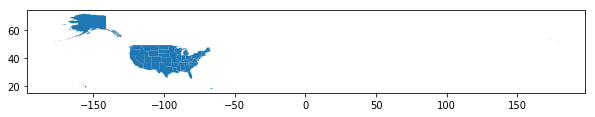

In [0]:
country = geopandas.read_file('gz_2010_us_040_00_5m.json')
country.plot(figsize=(10, 5))

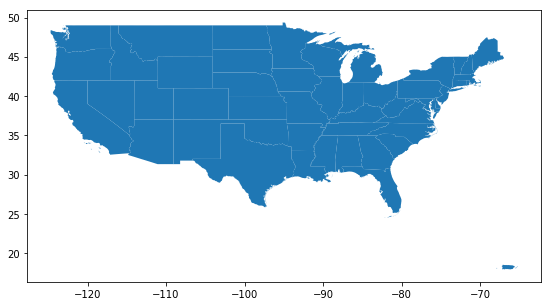

In [0]:
mainland = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]
mainland.plot(figsize=(10, 5))

In [0]:
florence = pd.read_csv('stormhistory.csv')
florence

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven
5,3A,08/31/2018 02:00,13.4,21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/31/2018 01:42,Berg
6,4,08/31/2018 05:00,13.6,21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 04:39,Berg
7,4A,08/31/2018 08:00,13.7,21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 07:33,Avila
8,5,08/31/2018 11:00,13.7,22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 10:38,Avila
9,5A,08/31/2018 14:00,13.8,23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 13:33,Avila


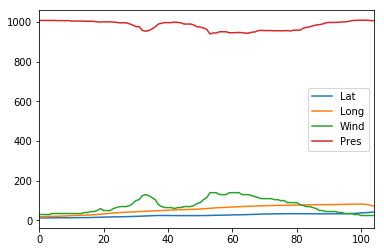

In [0]:
florence.plot()

We noticed that this is a plain old `DataFrame` and does not have the capability of doing geo operations yet. We first have to
transform the data into a `GeoDataFrame` so we can plot it appropriately.

To do this, we will create a new colum that stores the latitude/longitude together in a `Point`. We needed a new Python function called `zip` in order to do this correctly.

In [0]:
x = [1, 2, 3]
y = [4, 5, 6]
z = zip(x, y)
for t in z:
  print(t)
  
for t in z:
  print(t)

(1, 4)
(2, 5)
(3, 6)


With that basic idea of zip, we can do that with the whole Latitude/Longitude columns.

In [0]:
from shapely.geometry import Point

florence['coordinates'] = [Point(long, lat) for long, lat in 
                           zip(-florence['Long'], florence['Lat'])]

In [0]:
# Convert the florence DataFrame into a GeoDataFrame
florence_geo = geopandas.GeoDataFrame(florence, geometry='coordinates')

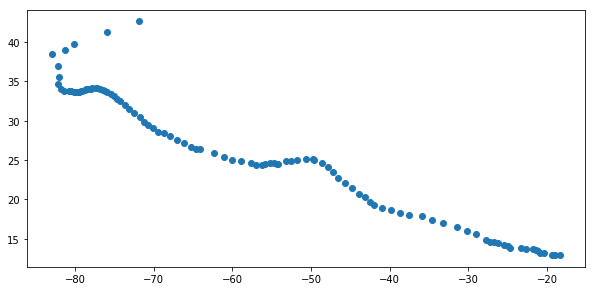

In [0]:
florence_geo.plot(figsize=(10, 5))

We first tried to just plot both datasets, but saw this didn't work with how `matplotlib` handles multiple plots. We saw that we needed to specifty a figure and set of axes to draw on so all of them appeared on the same set of axes.

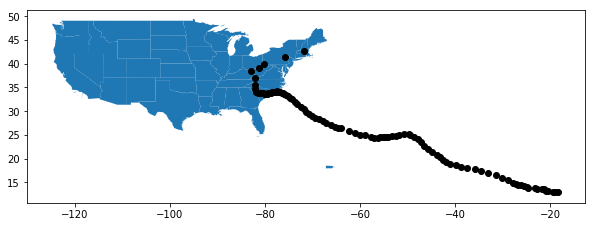

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 10))
mainland.plot(ax=ax)
florence_geo.plot(ax=ax, color='#000000')